<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [35]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import glob

import argparse
from pathlib import Path
import os

from veloce_luminosa_reduction import config

import matplotlib.pyplot as plt
from astropy.io import fits

# from veloce_luminosa_reduction.plotting import plot_ccd_imshow, create_rainbow_colormap, create_transparent_greyscale_colormap
# from veloce_luminosa_reduction.utils import identify_calibration_and_science_runs, match_month_to_date, read_veloce_fits_image_and_metadata, polynomial_function, radial_velocity_shift, interpolate_spectrum
# from veloce_luminosa_reduction.reduction import substract_overscan, extract_initial_order_ranges_and_coeffs
# from veloce_luminosa_reduction.calibration import get_wavelength_coeffs_from_vdarc
# from veloce_luminosa_reduction.korg_synthesis import calculate_synthetic_korg_spectrum
# from veloce_luminosa_reduction.post_processing import degrade_resolution_with_uncertainty, interpolate_orders_and_merge, coadd_spectra

# import time
# import numpy as np
# from numpy.polynomial.chebyshev import Chebyshev
# from scipy.signal import medfilt, find_peaks
# from scipy.ndimage import gaussian_filter1d
# from scipy.optimize import curve_fit
# from astropy.table import Table
# from astropy.time import Time
# from astropy.coordinates import SkyCoord, EarthLocation
# import astropy.units as u
# SSO = EarthLocation.of_site('Siding Spring Observatory')

In [36]:
config.date = '240219'

In [37]:
path = config.working_directory+'reduced_data/'+config.date+'/minimal_spectra/'
print(path, len(path))
science_objects = [x[79:] for x in glob.glob(path+'*')]
science_objects

/Users/buder/git/veloce_luminosa_reduction/reduced_data/240219/minimal_spectra/ 79


['HIP57757',
 'HIP73184',
 'HIP37664',
 'HIP71681',
 'HIP67459',
 'HIP63608',
 'HIP50887',
 'HIP65721',
 'HIP74975',
 'HIP71683',
 'HIP69673',
 'HIP56127',
 'HIP47431']

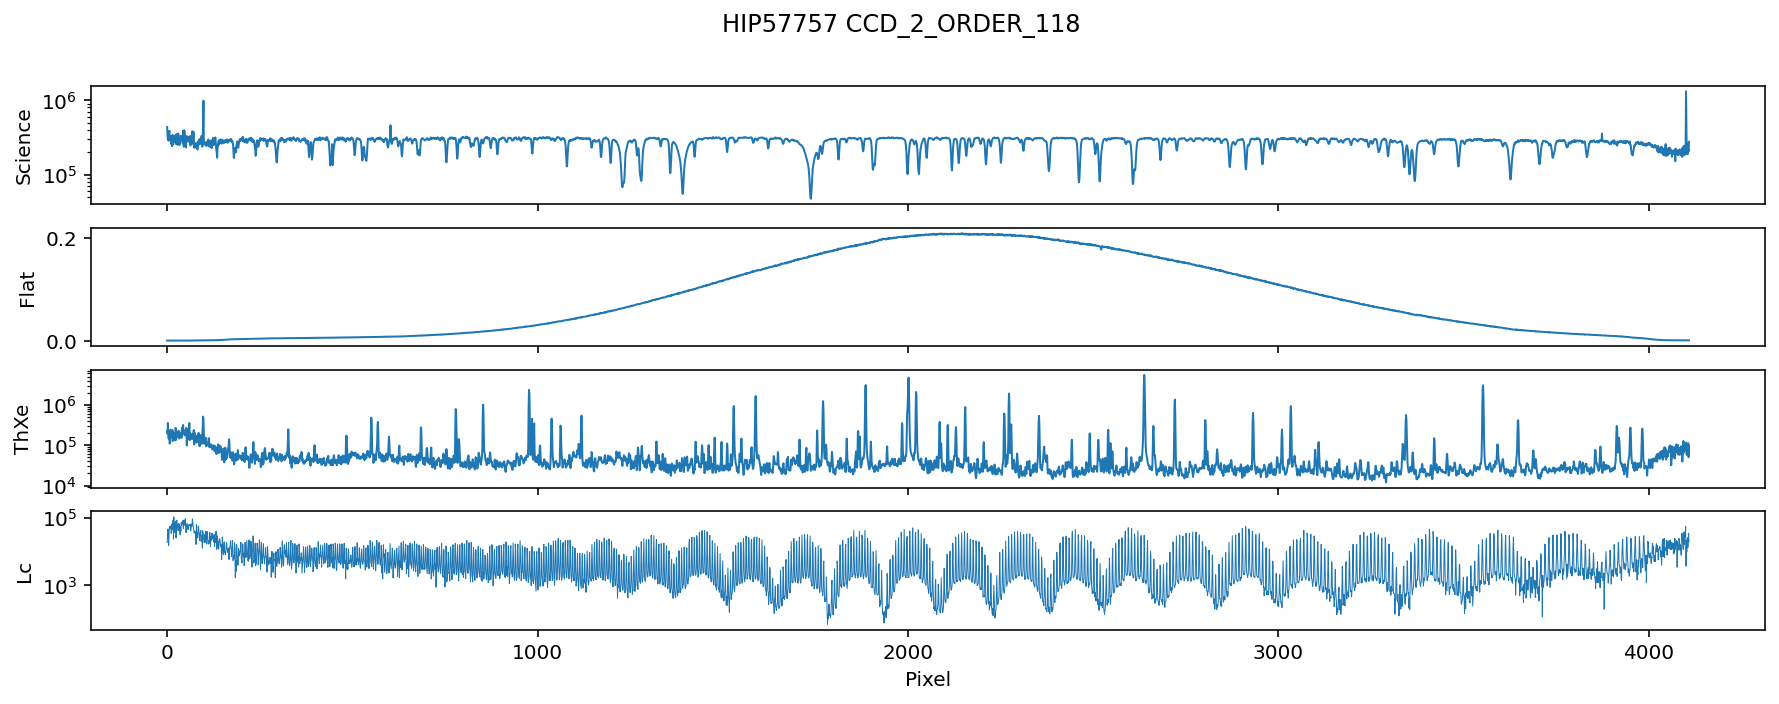

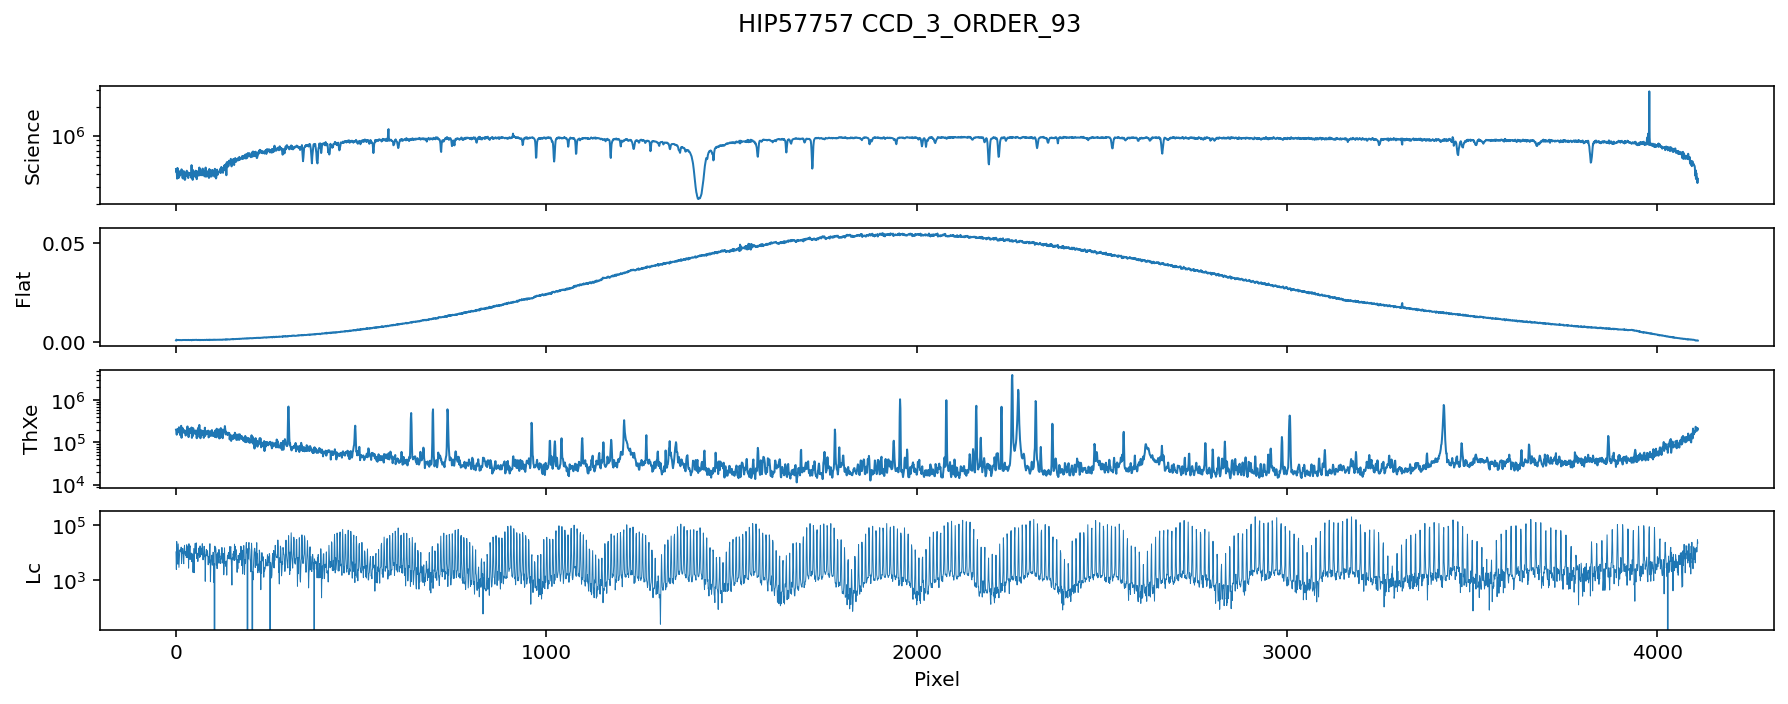

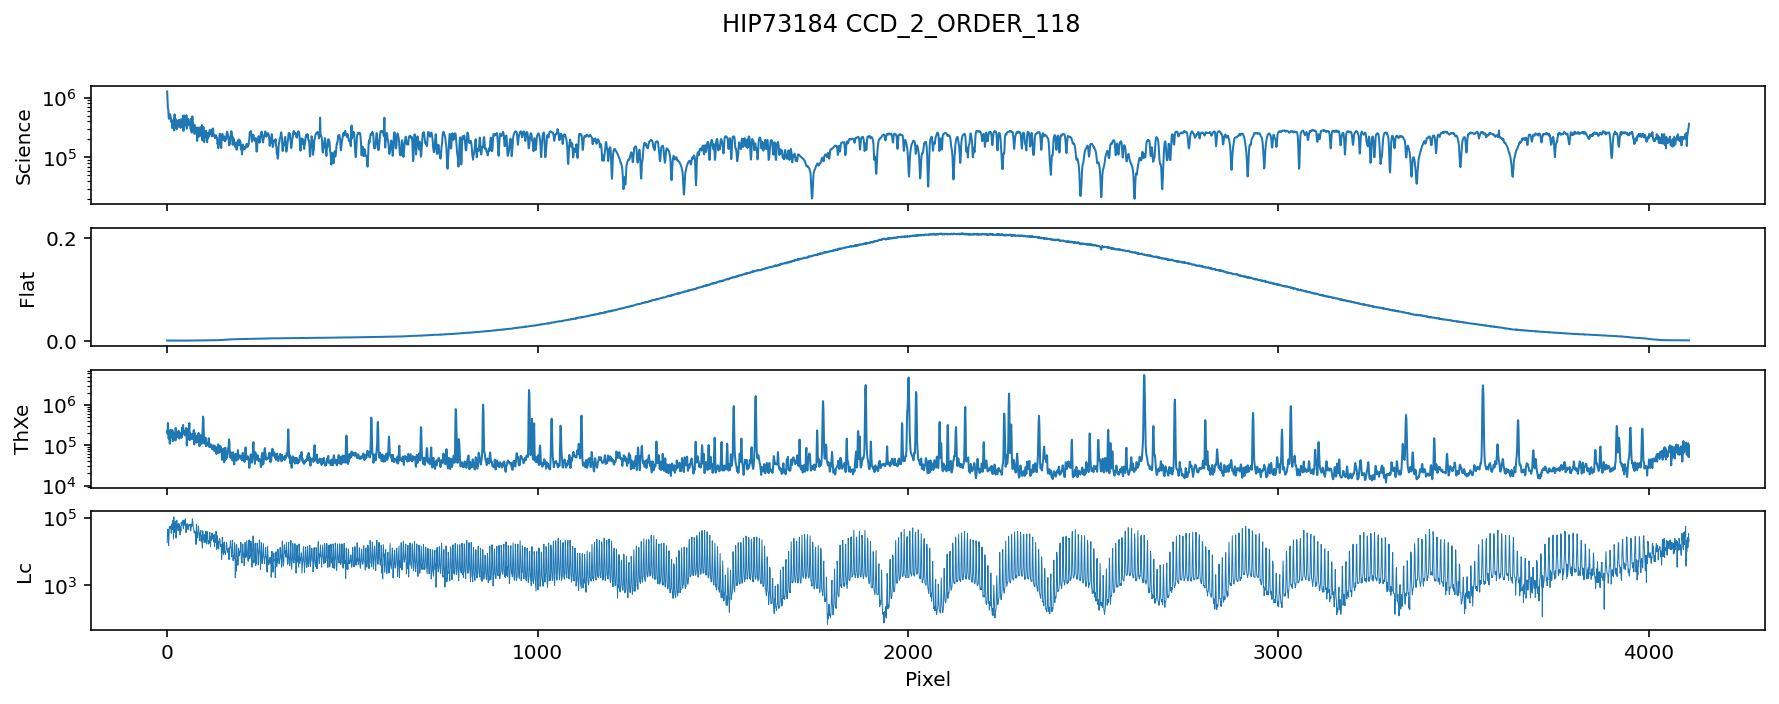

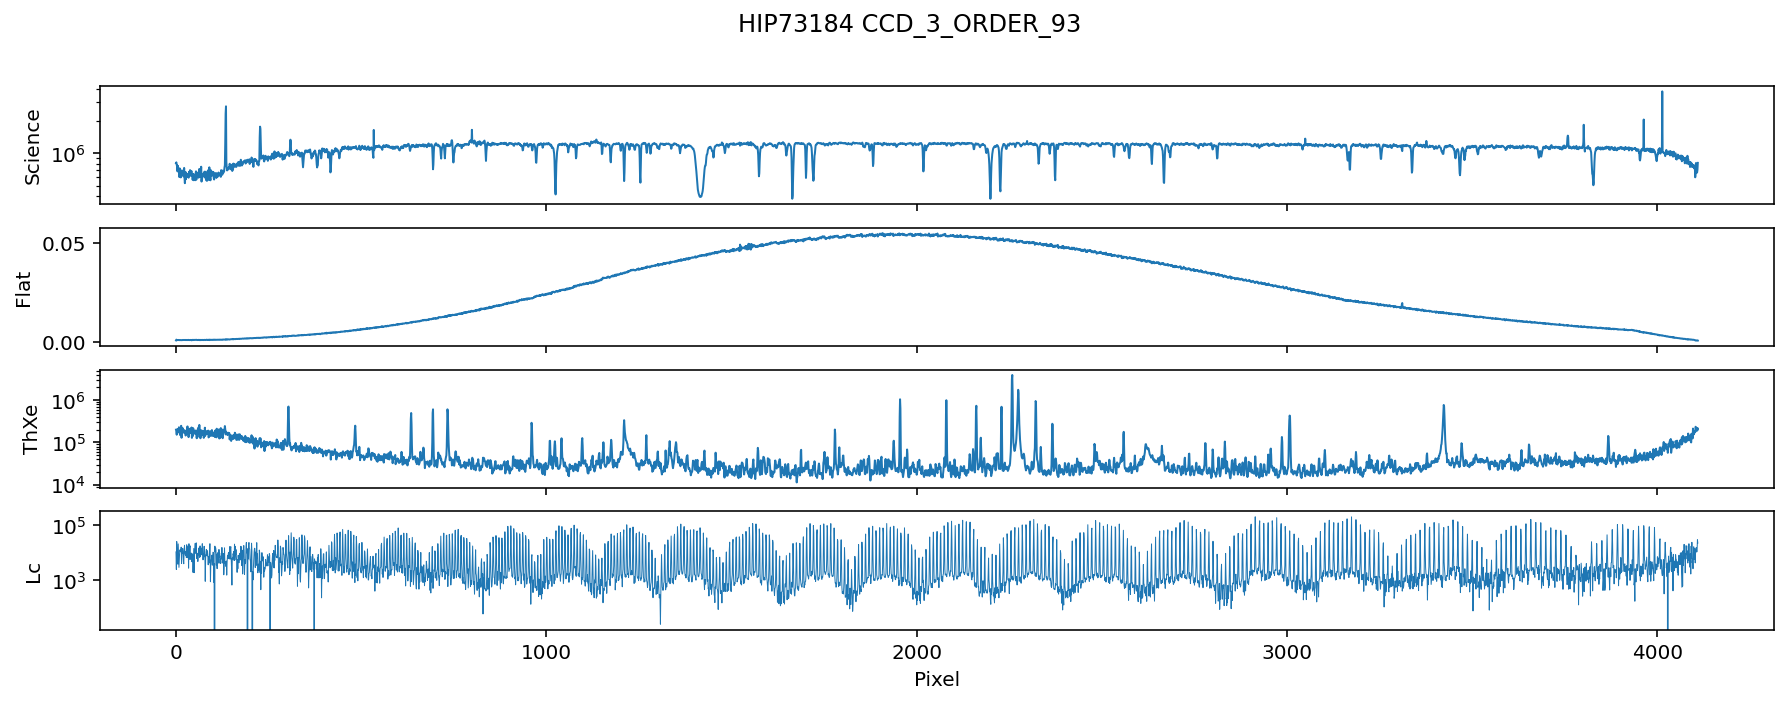

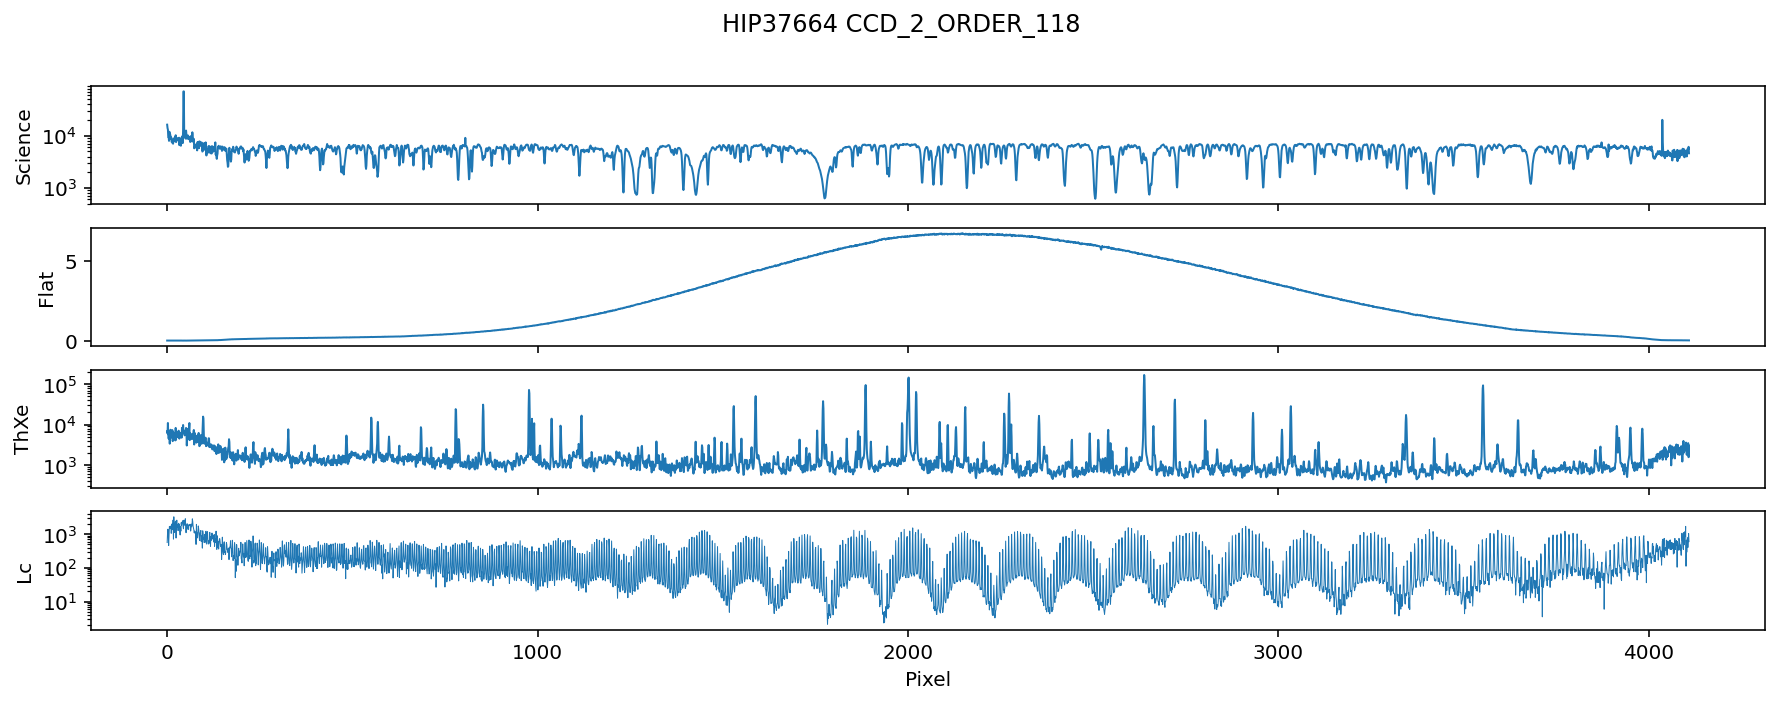

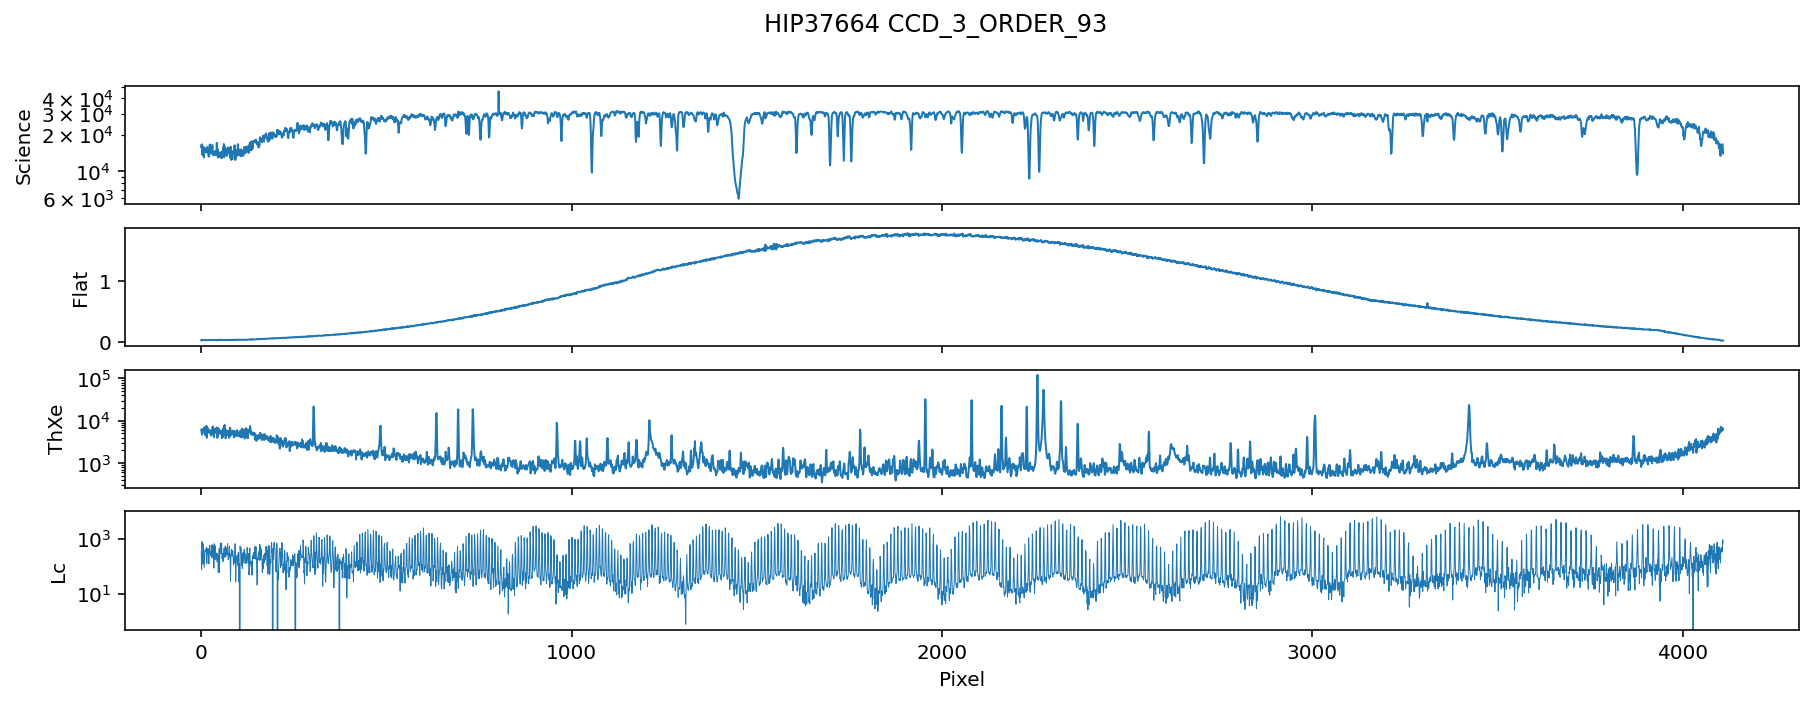

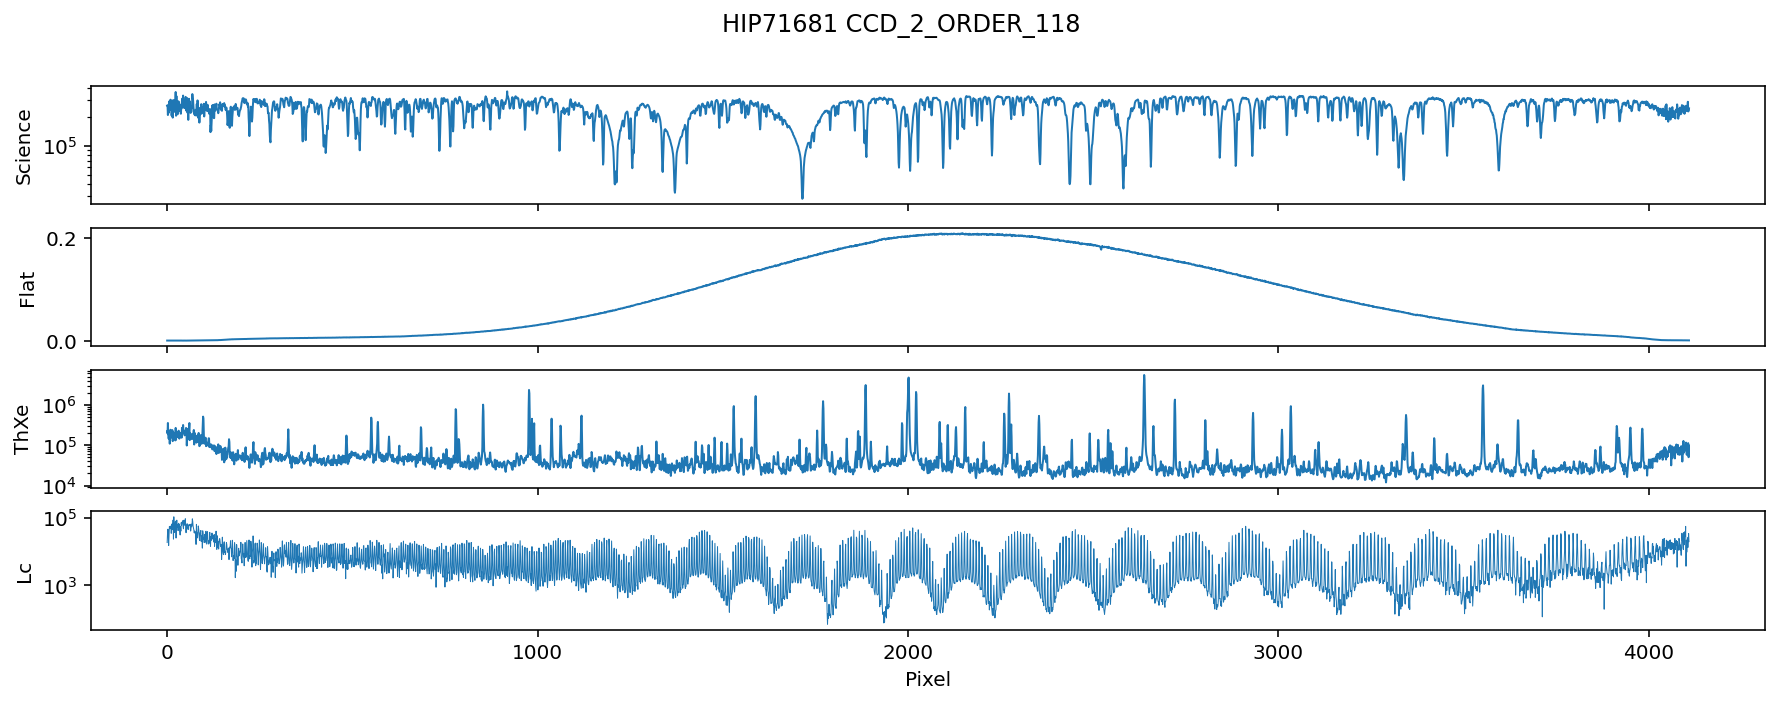

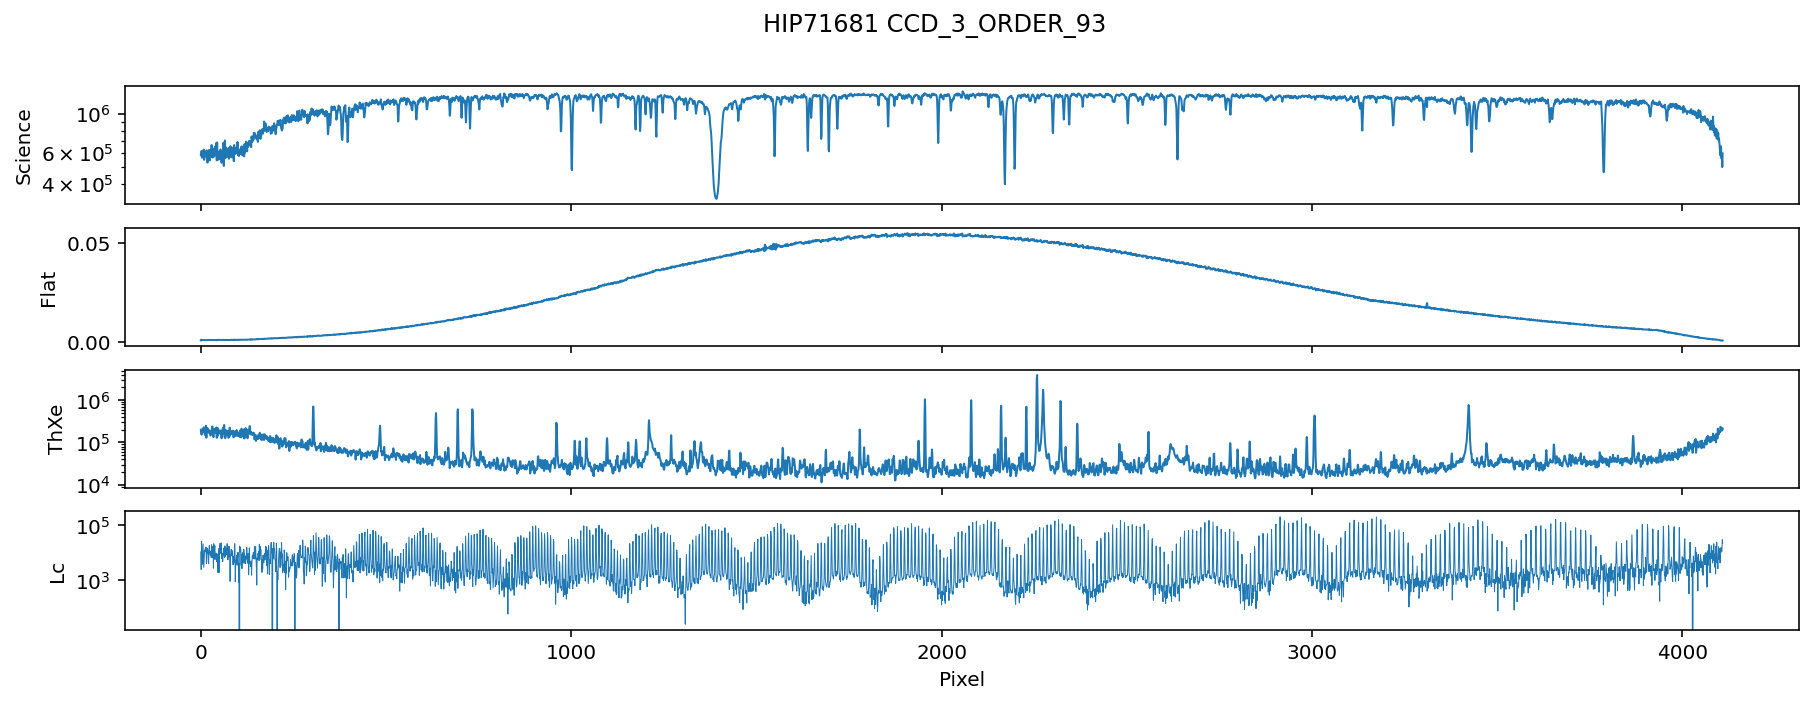

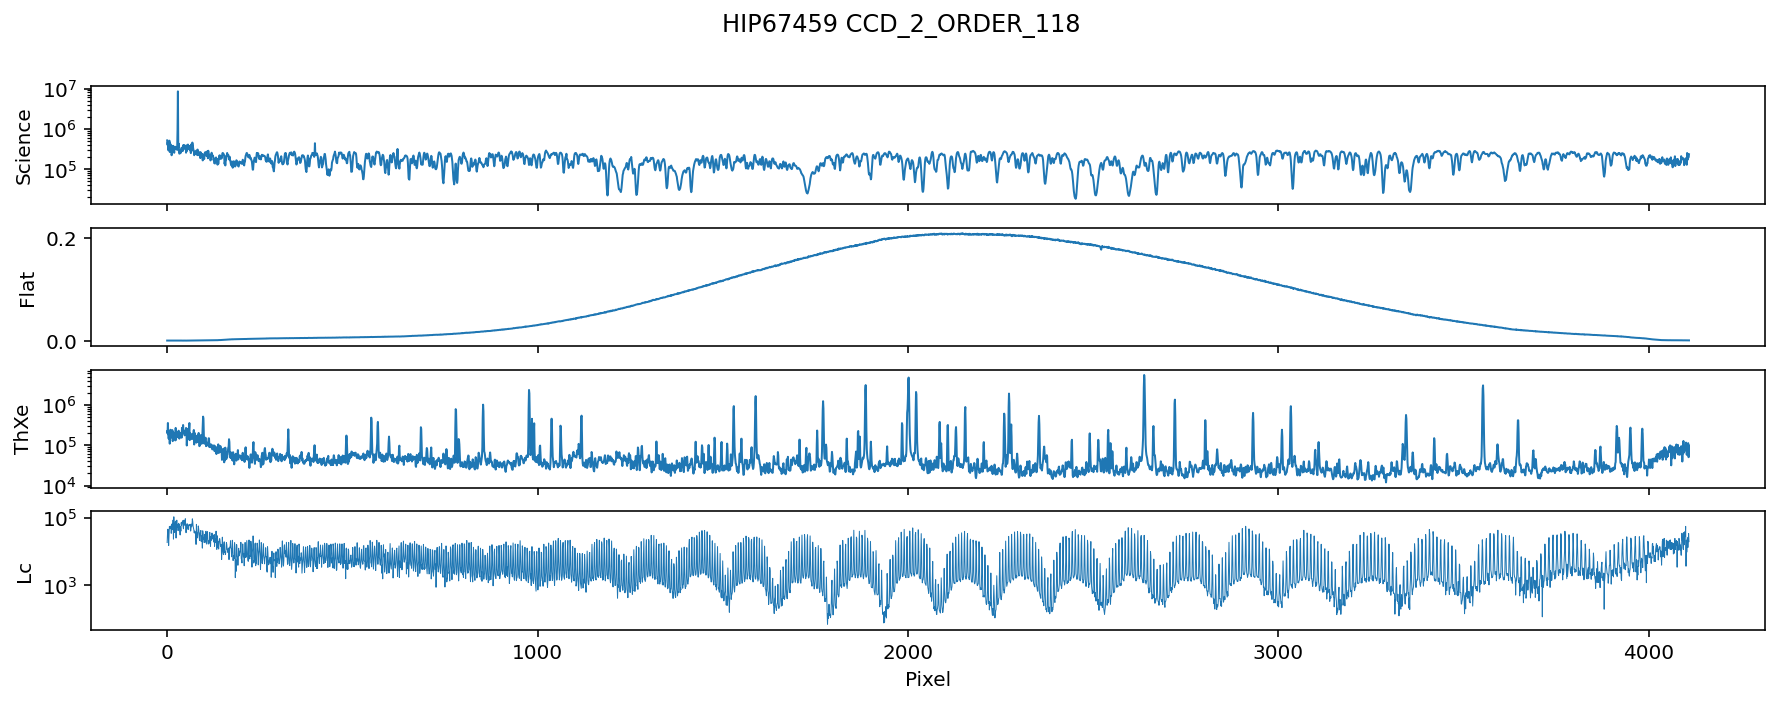

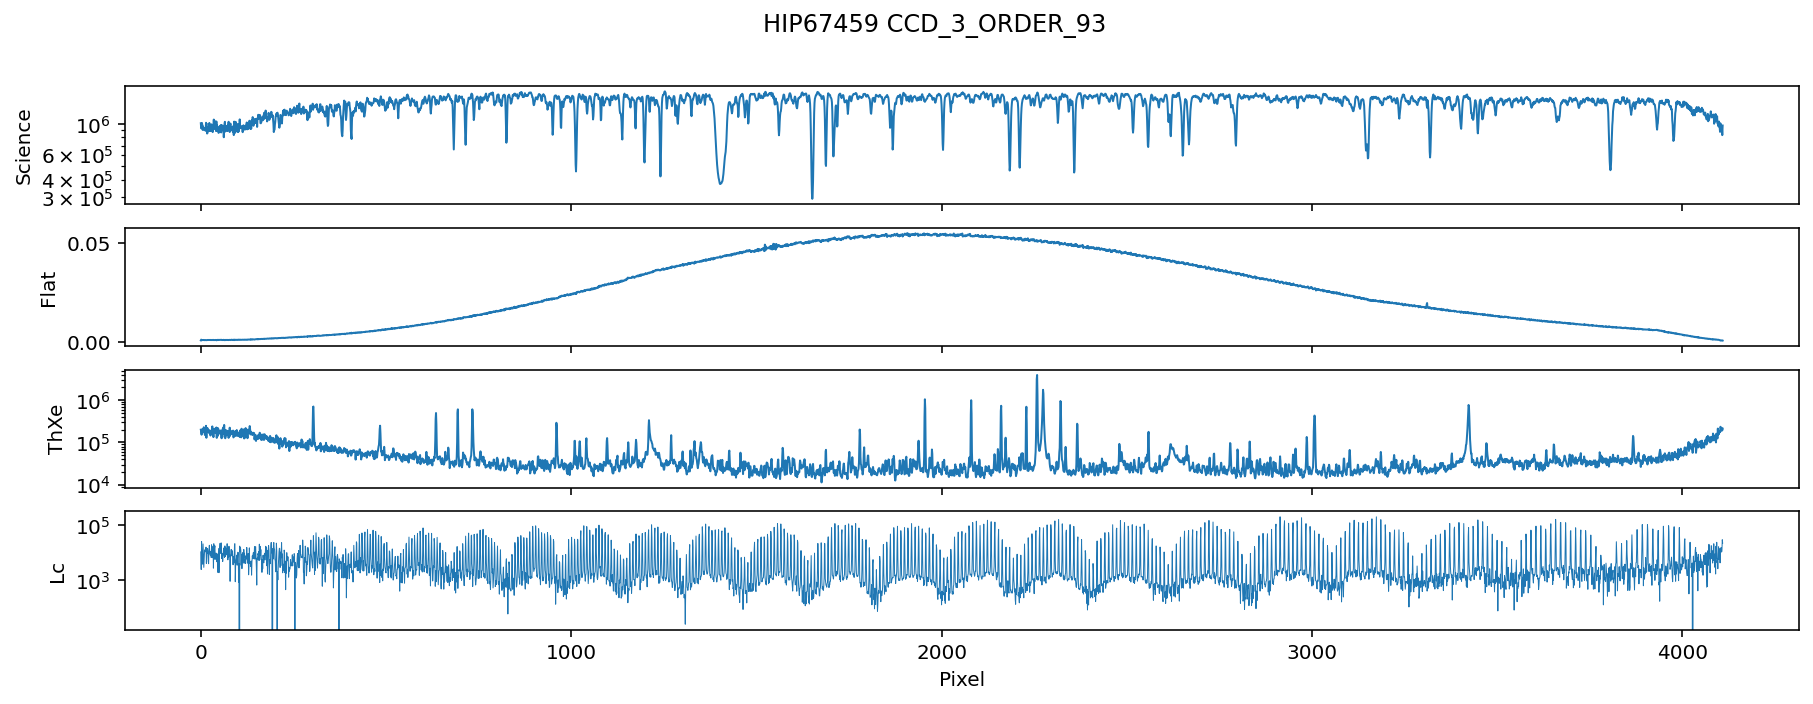

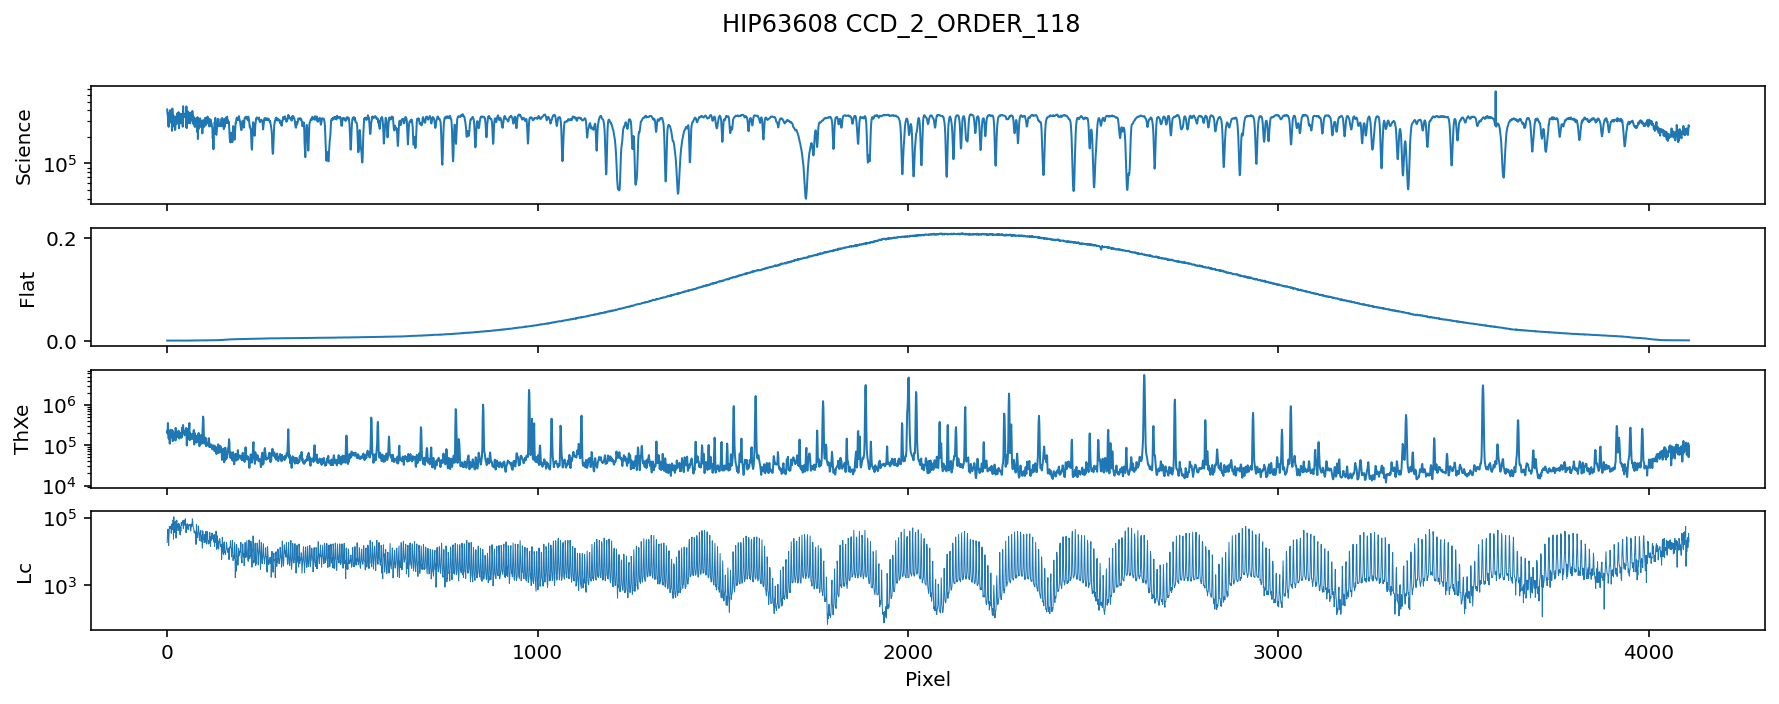

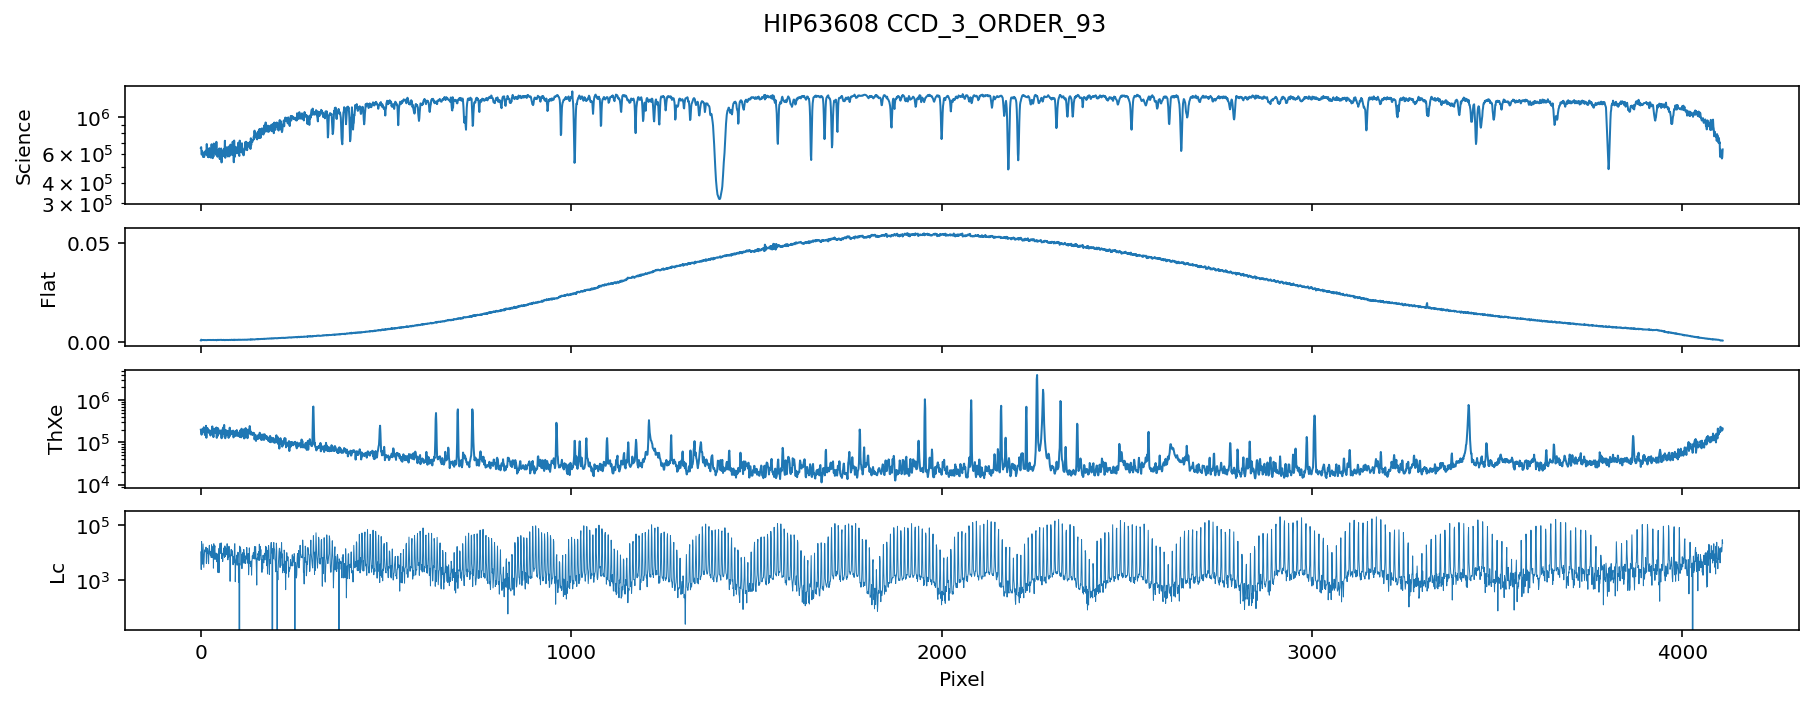

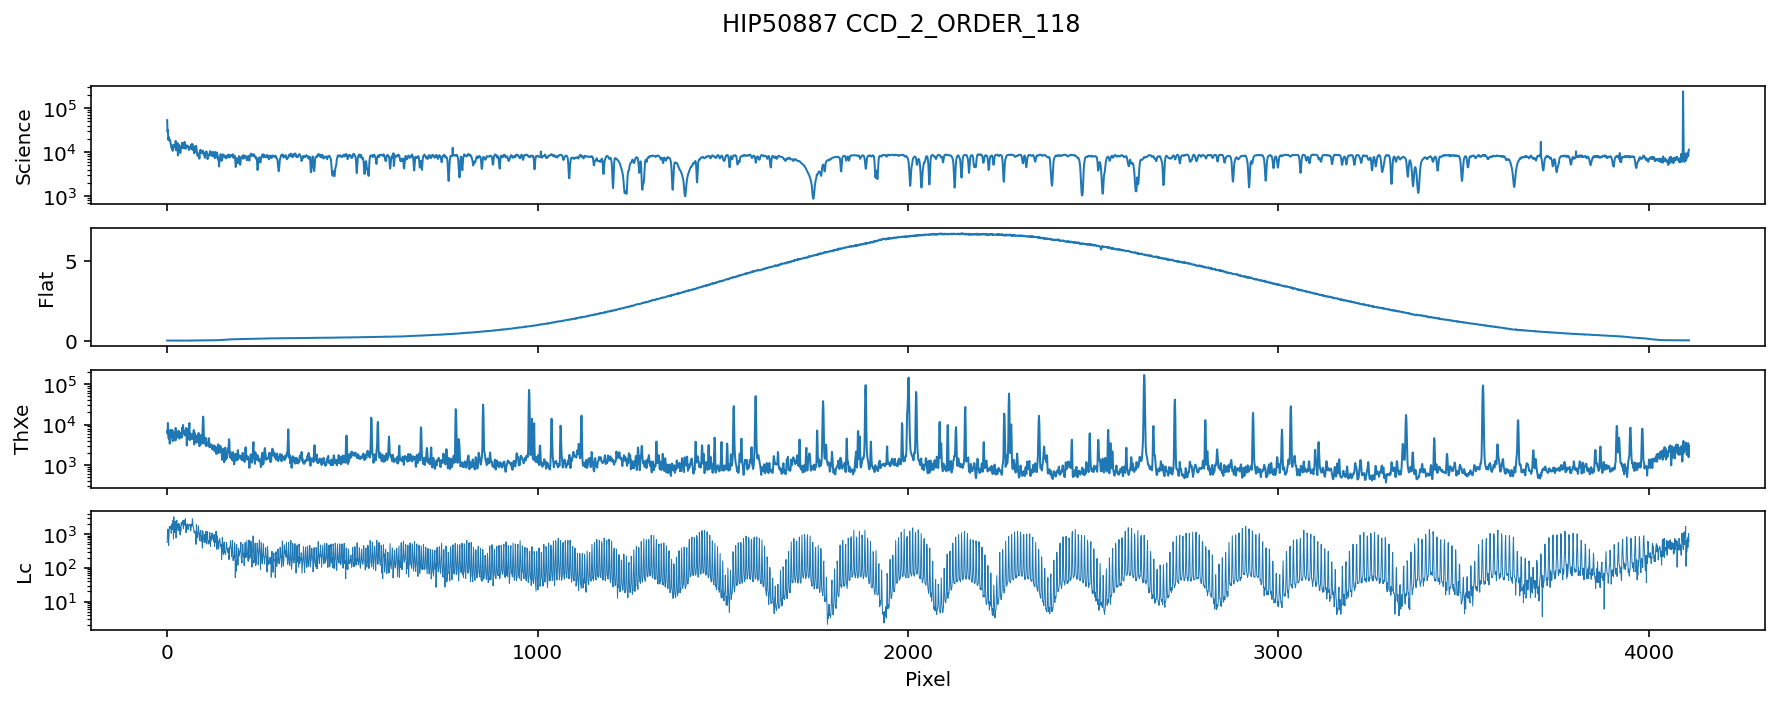

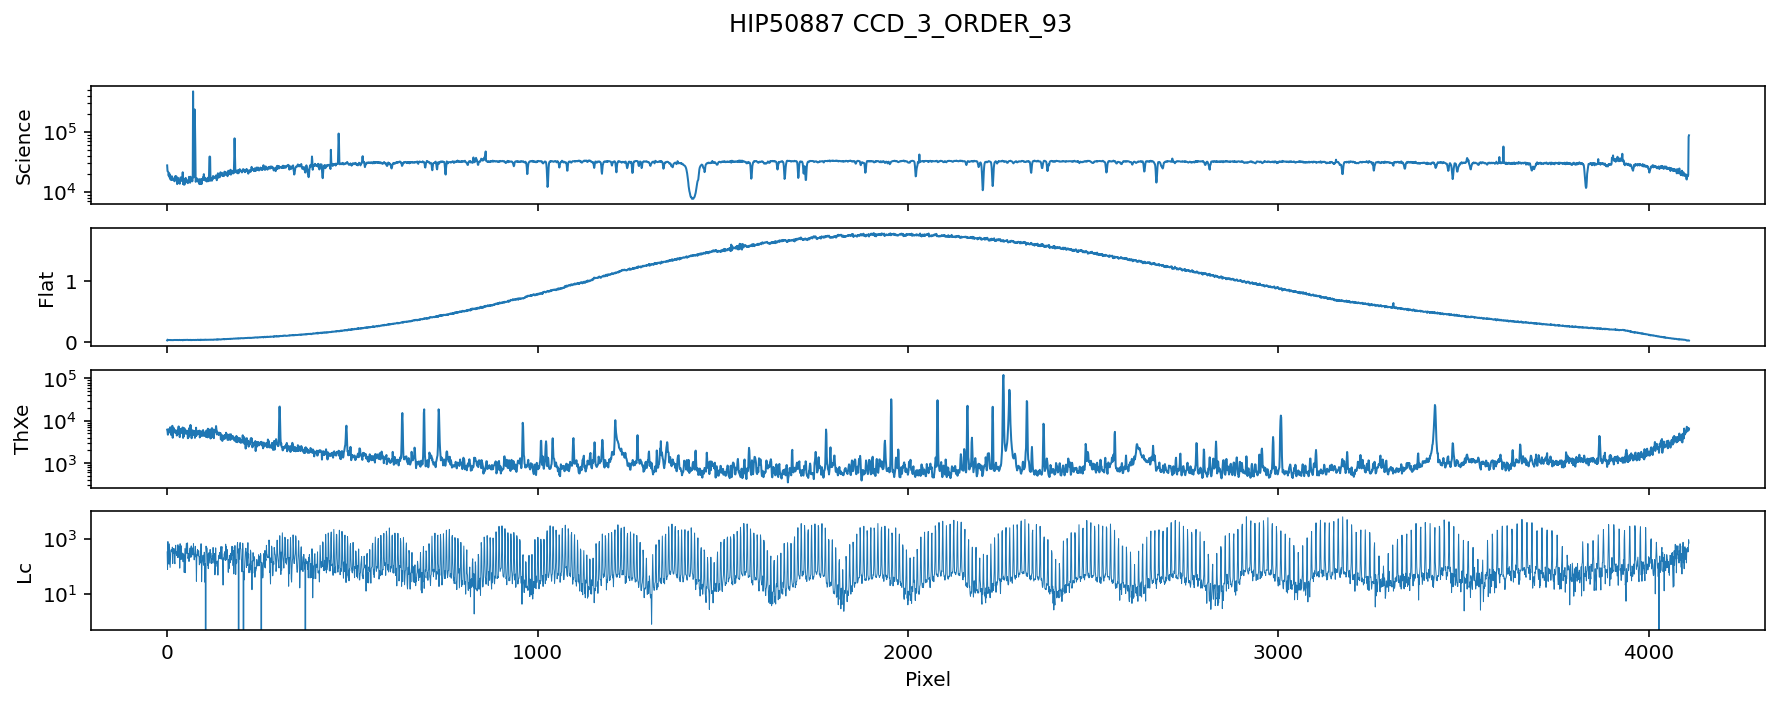

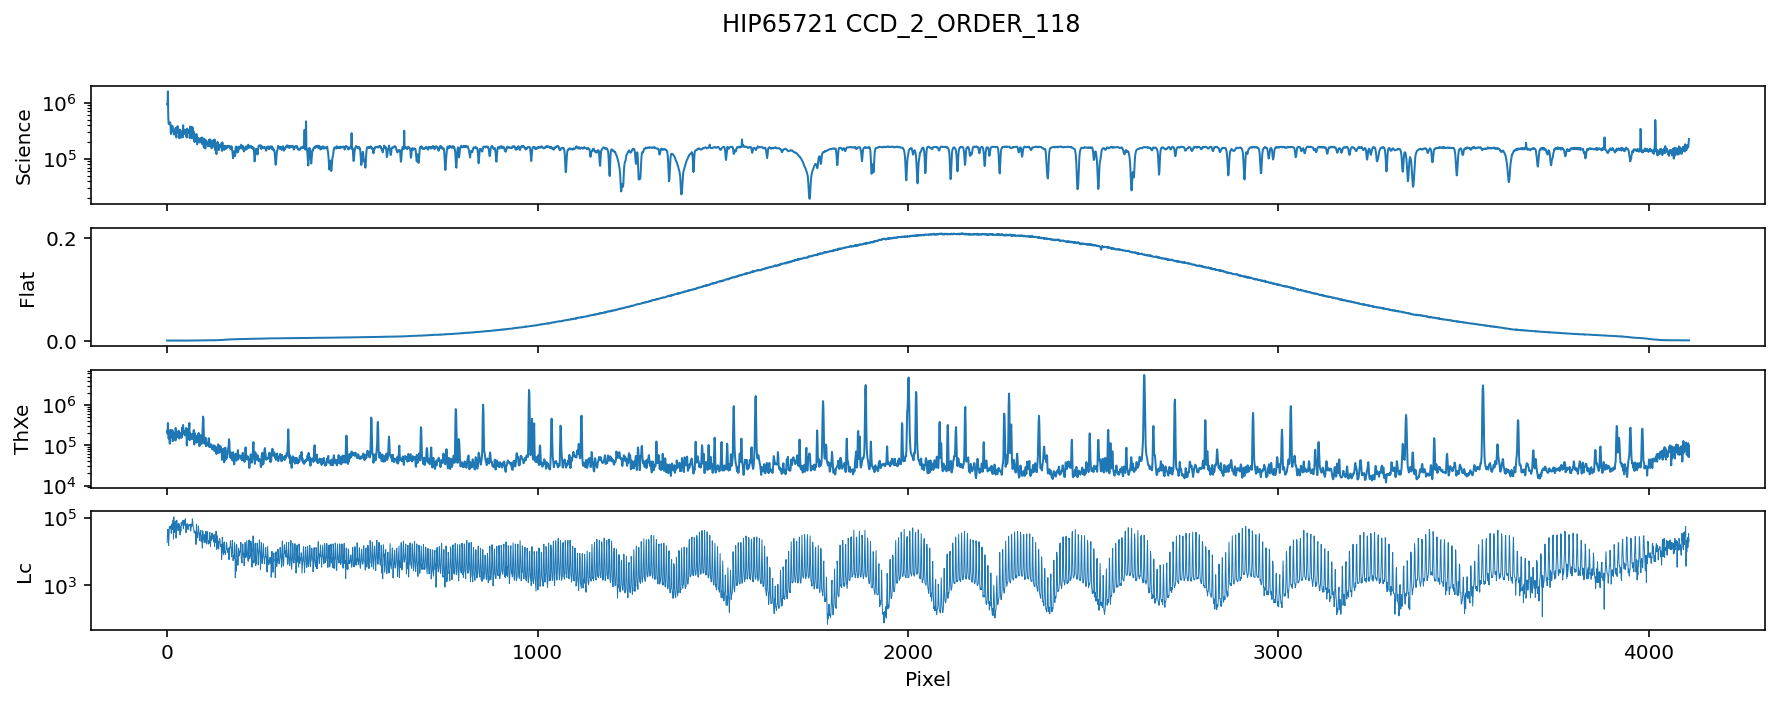

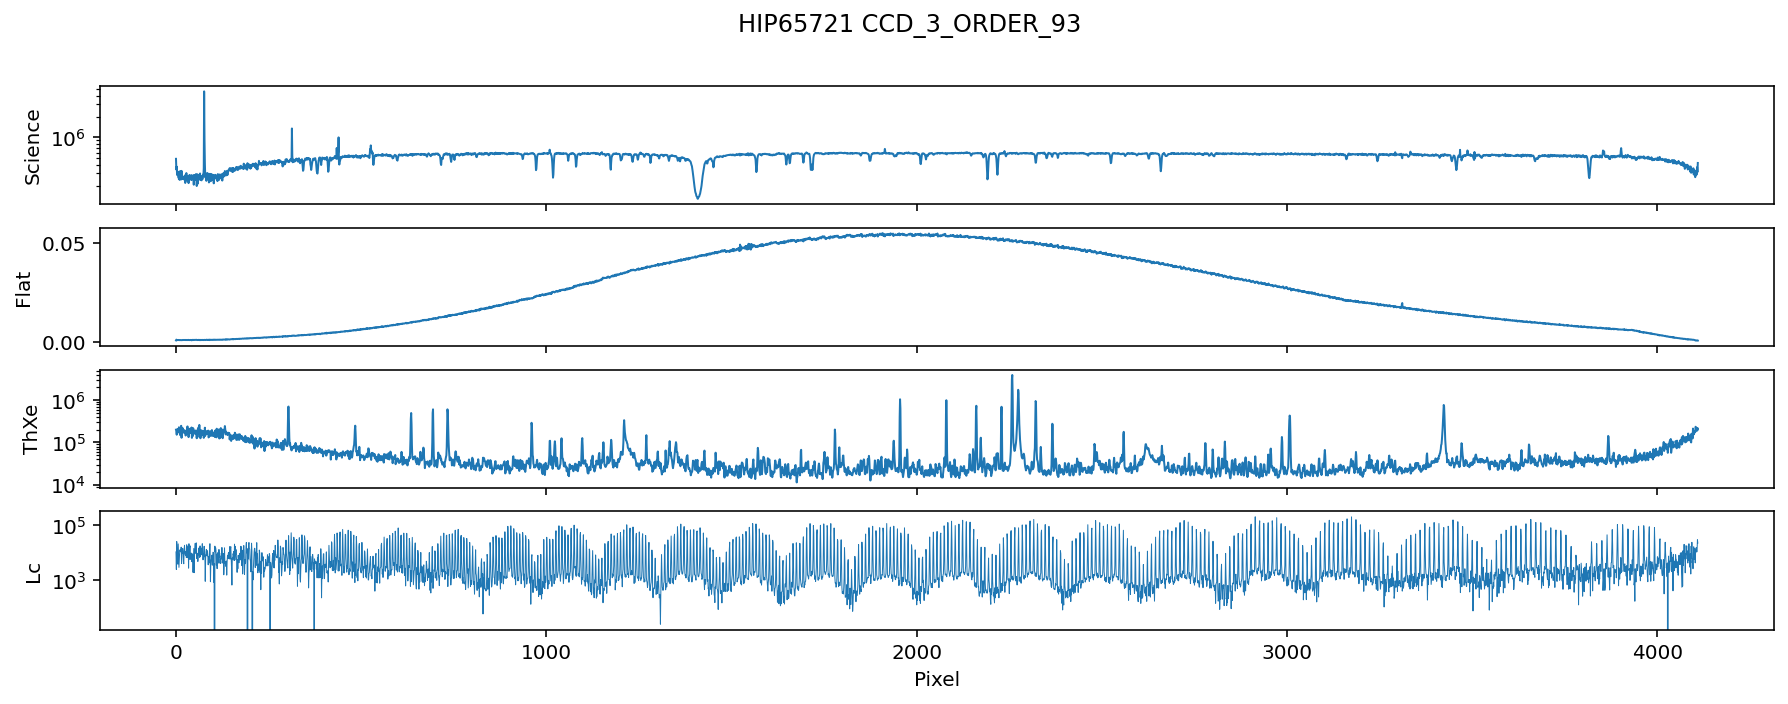

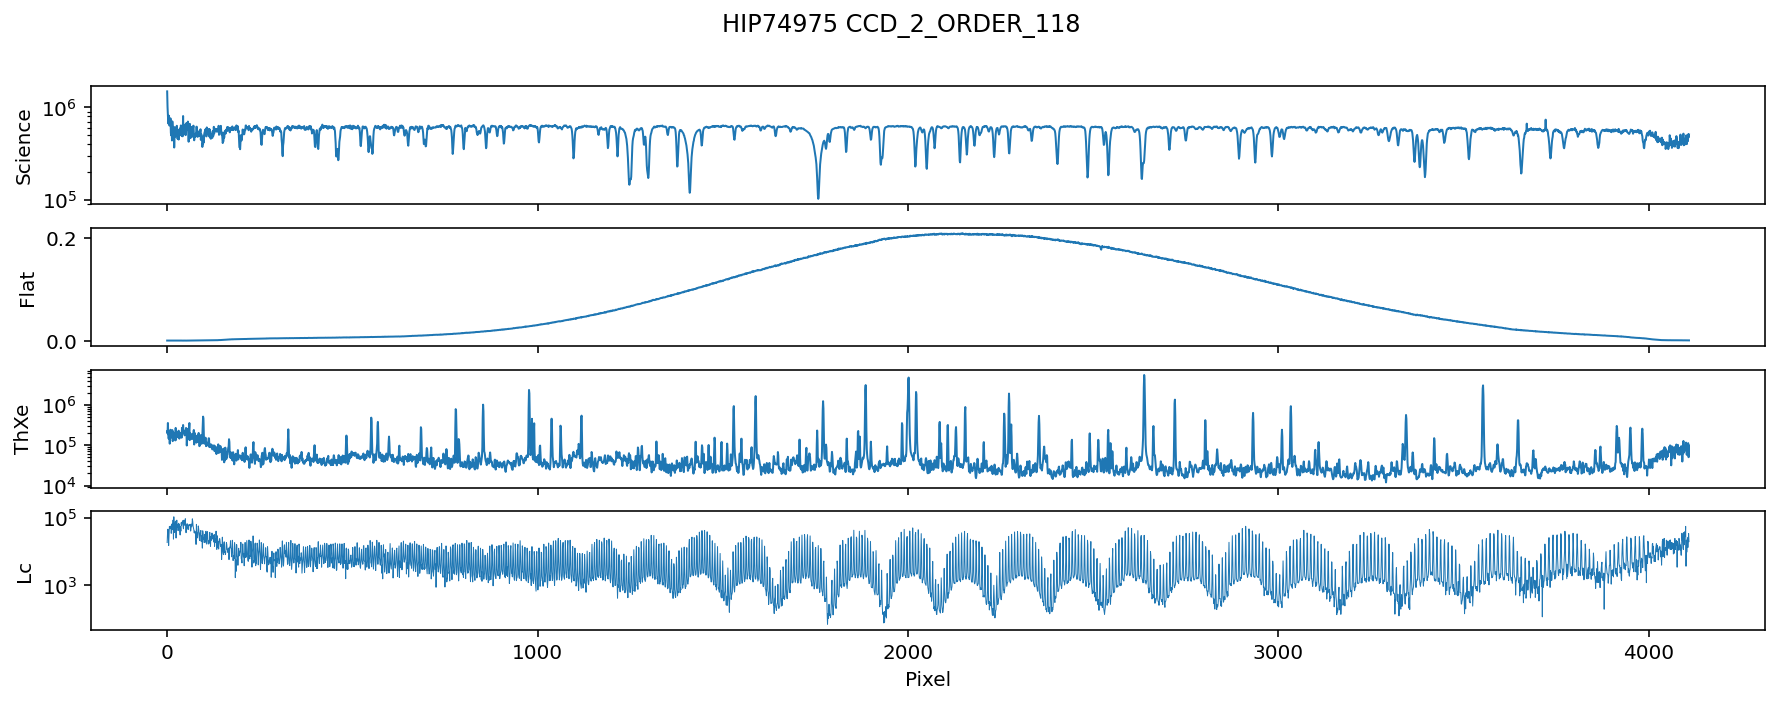

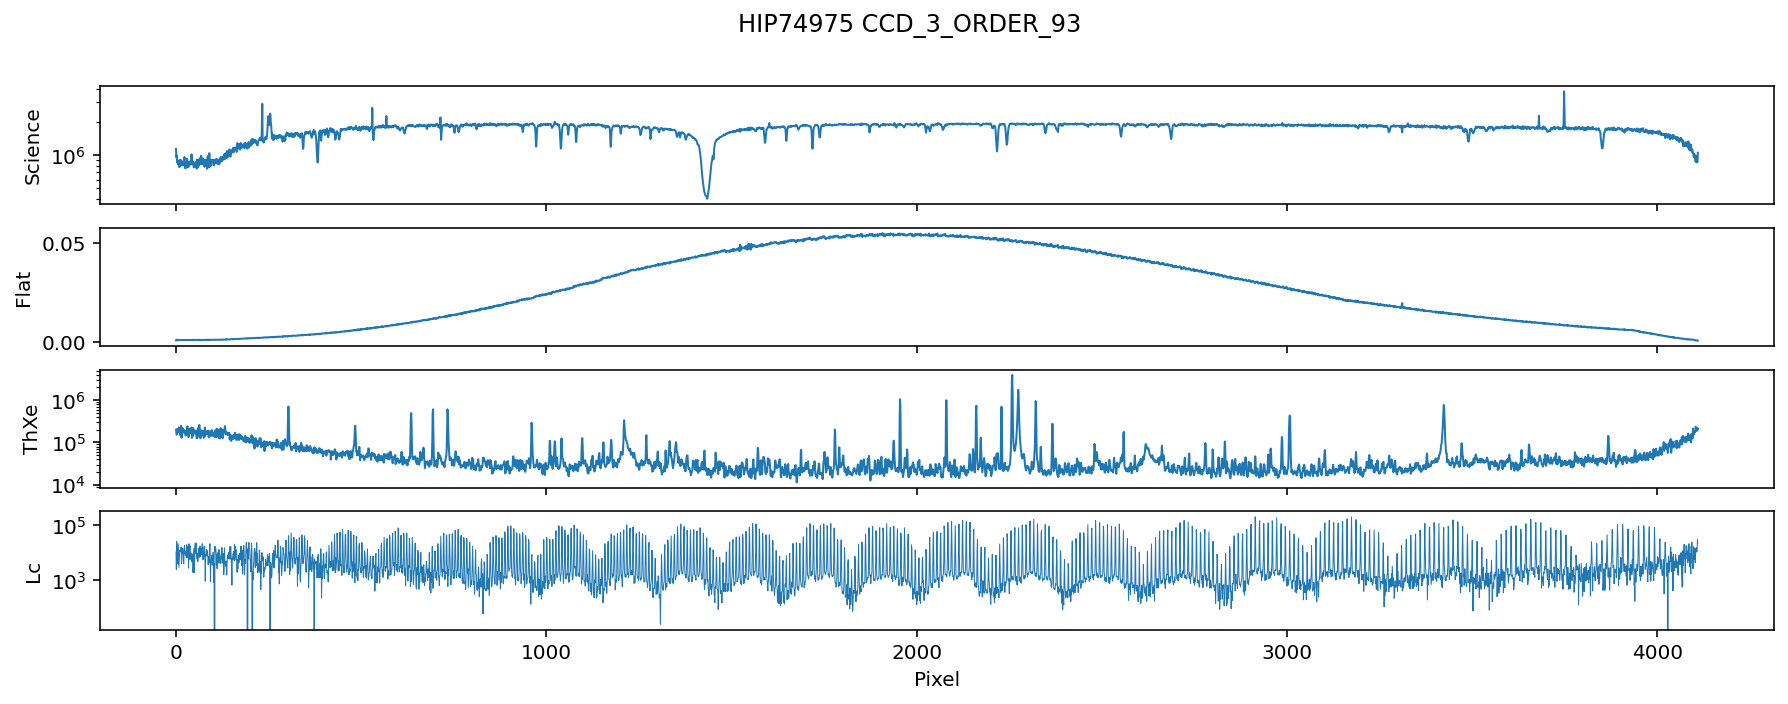

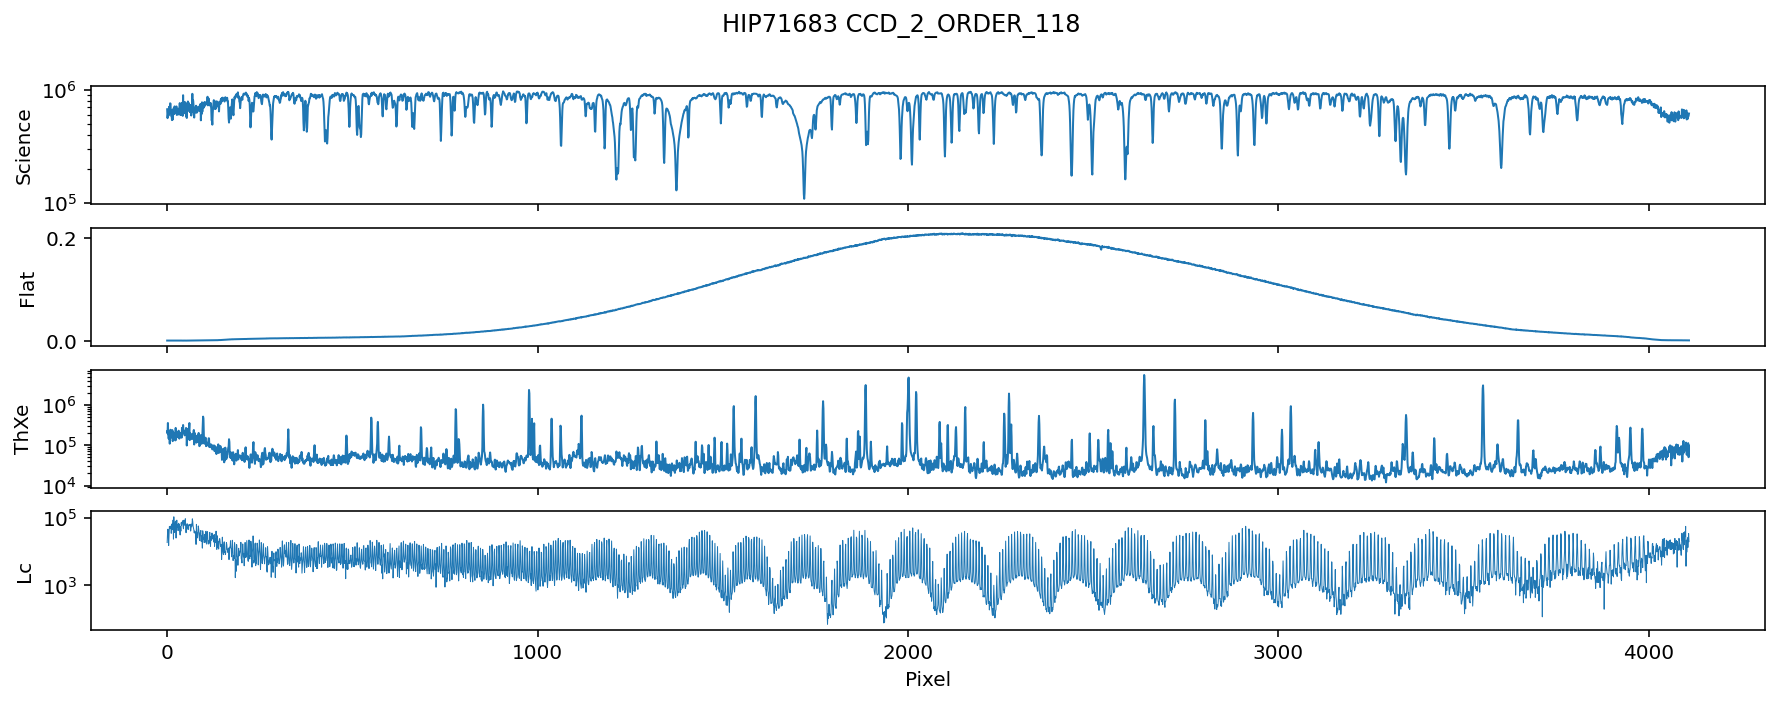

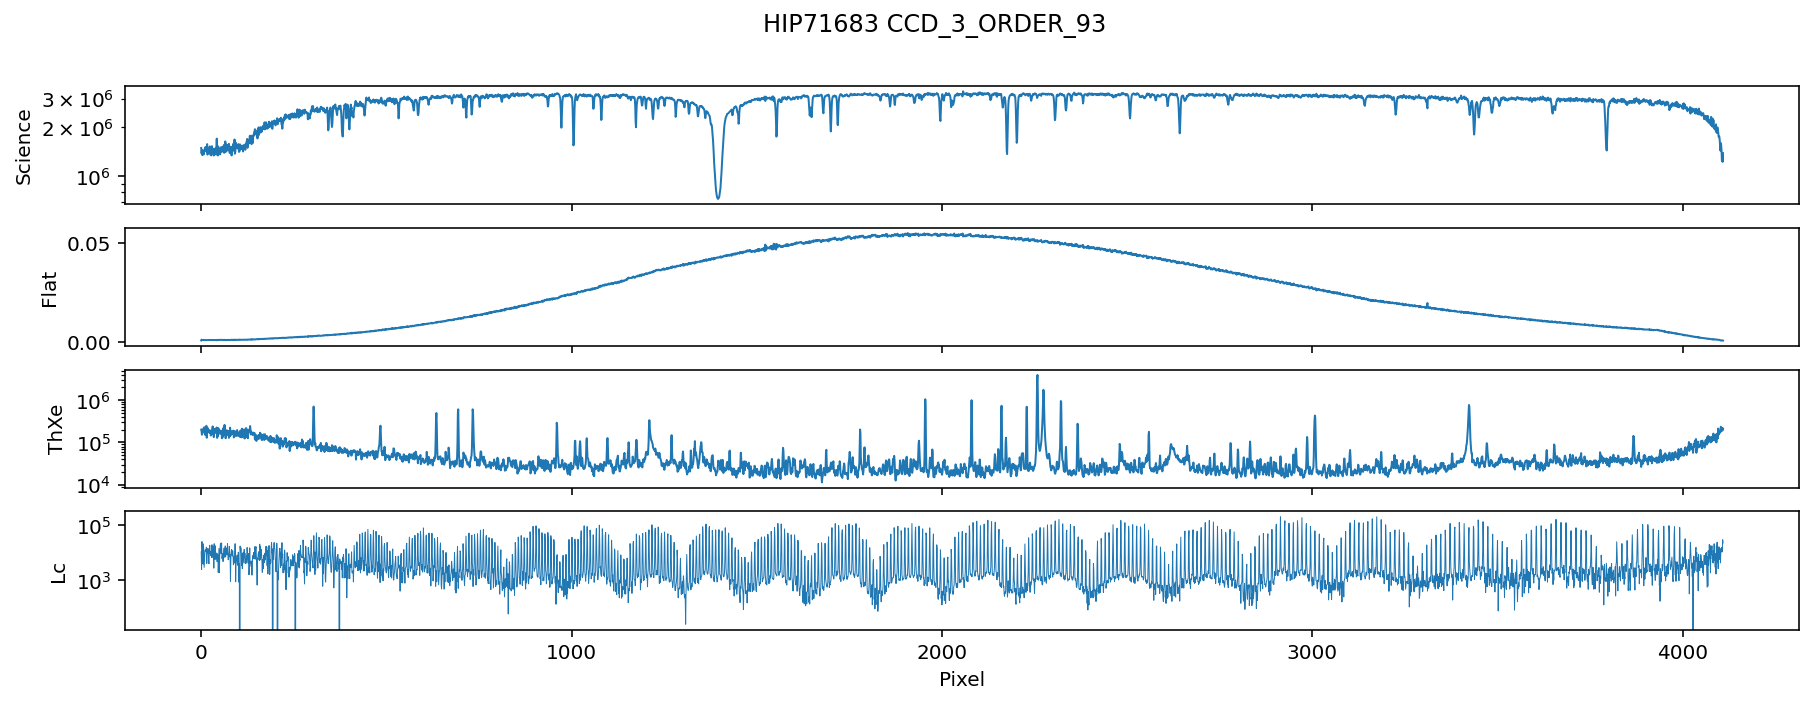

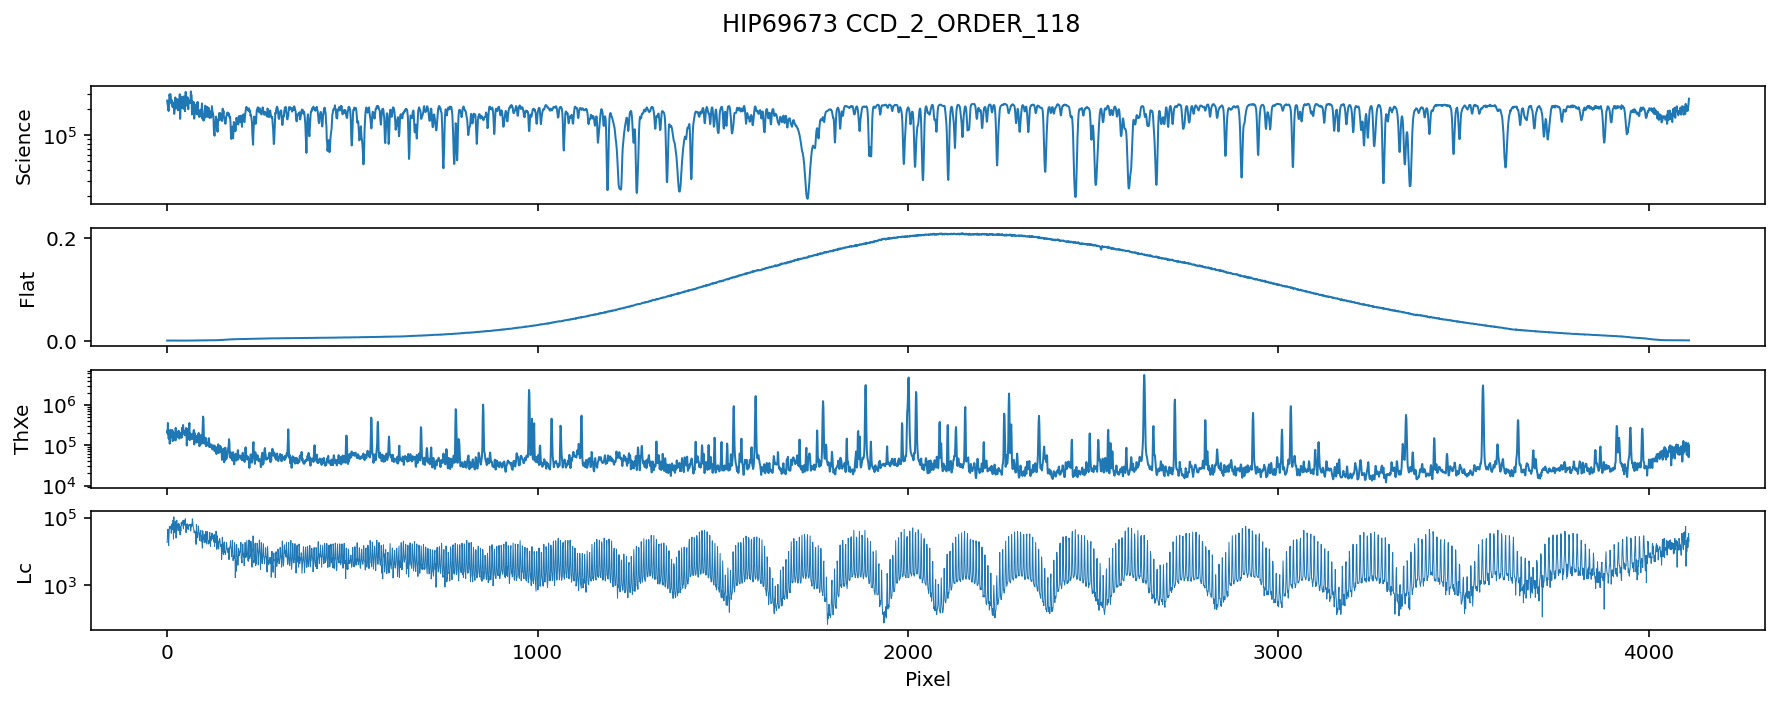

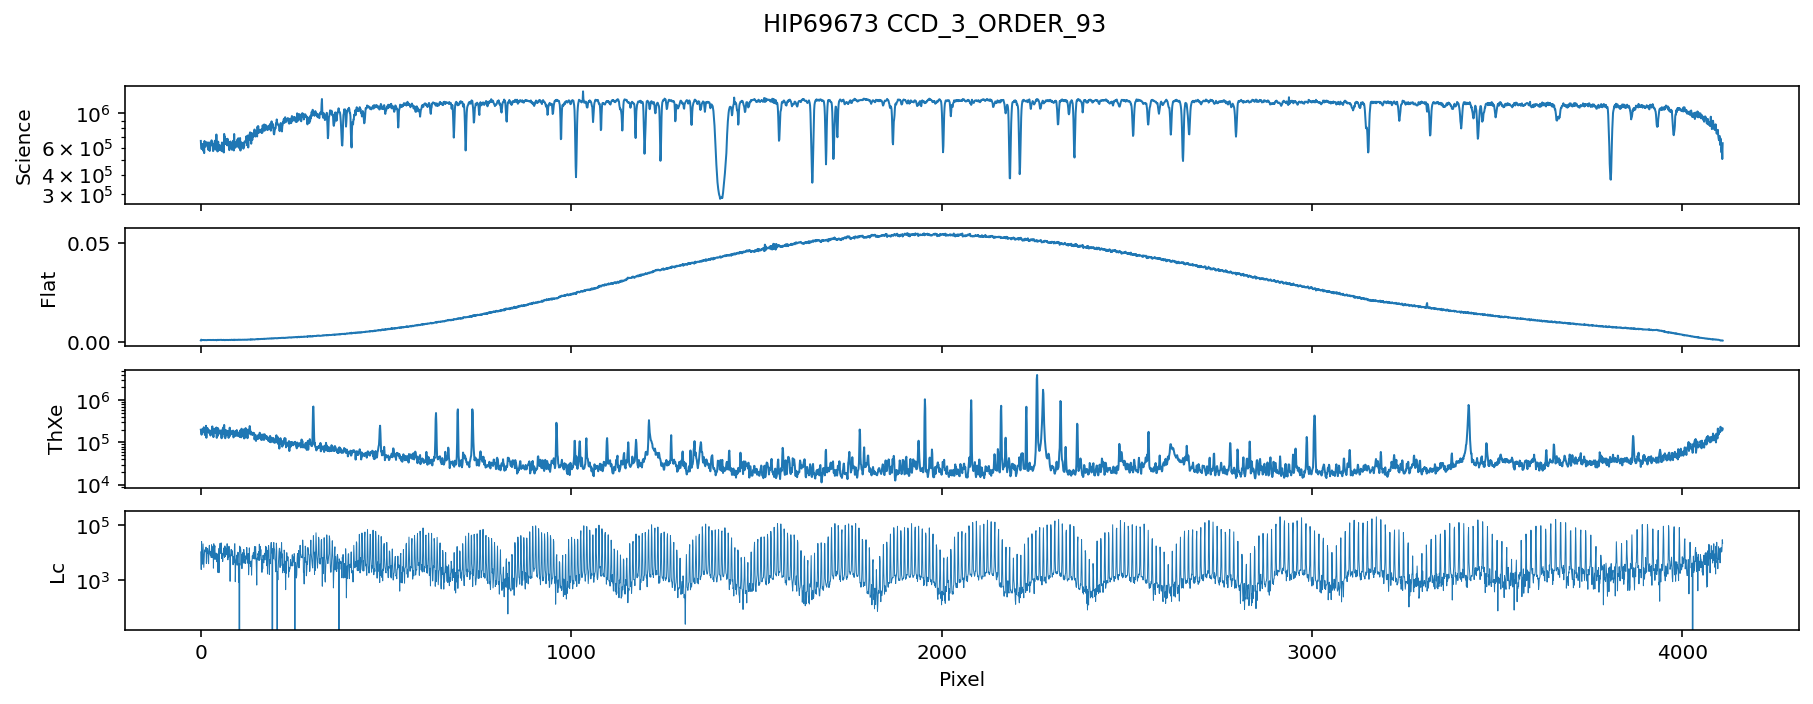

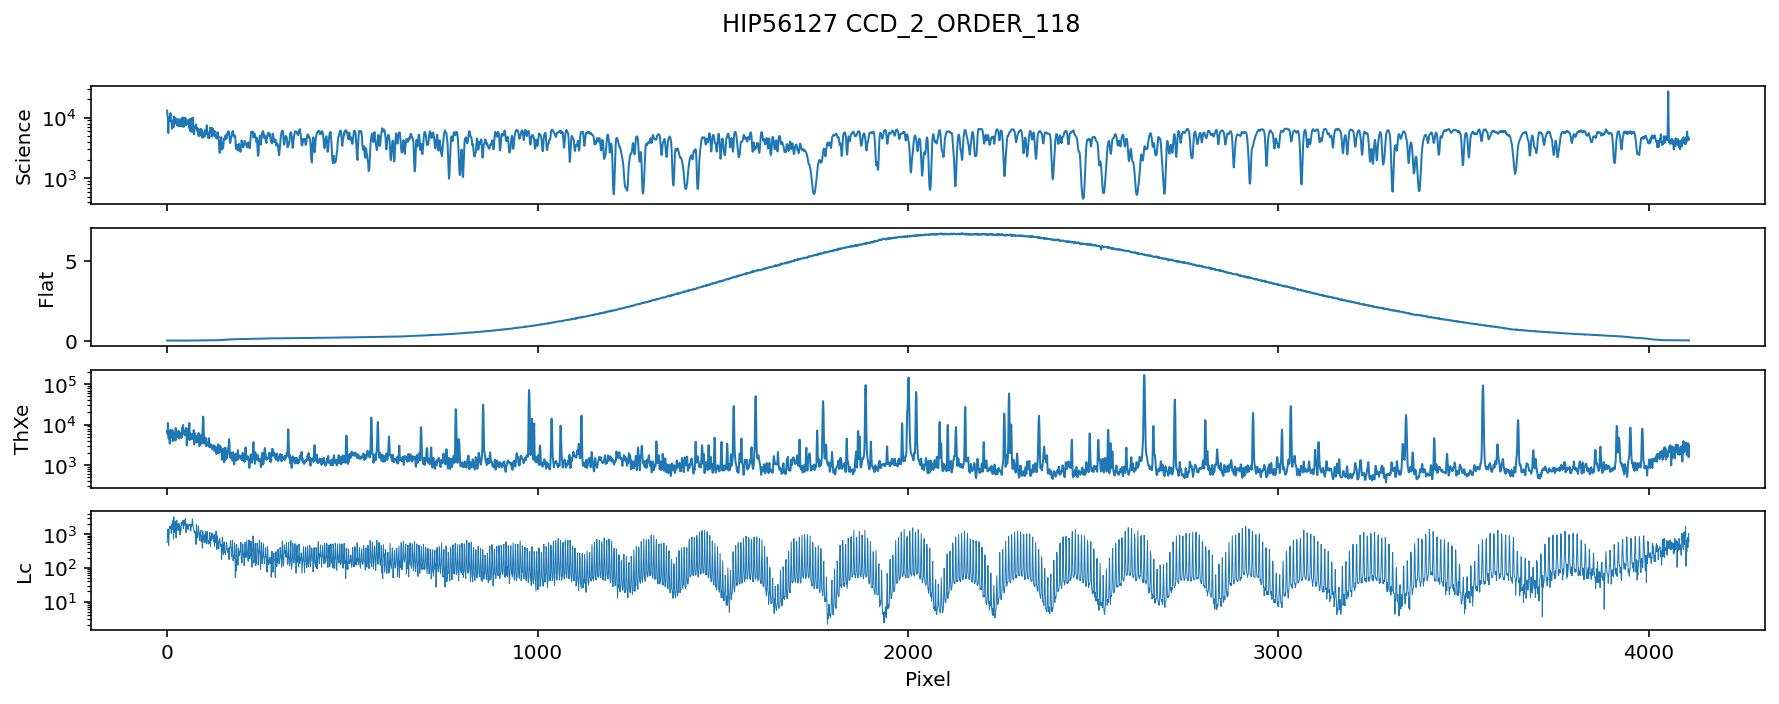

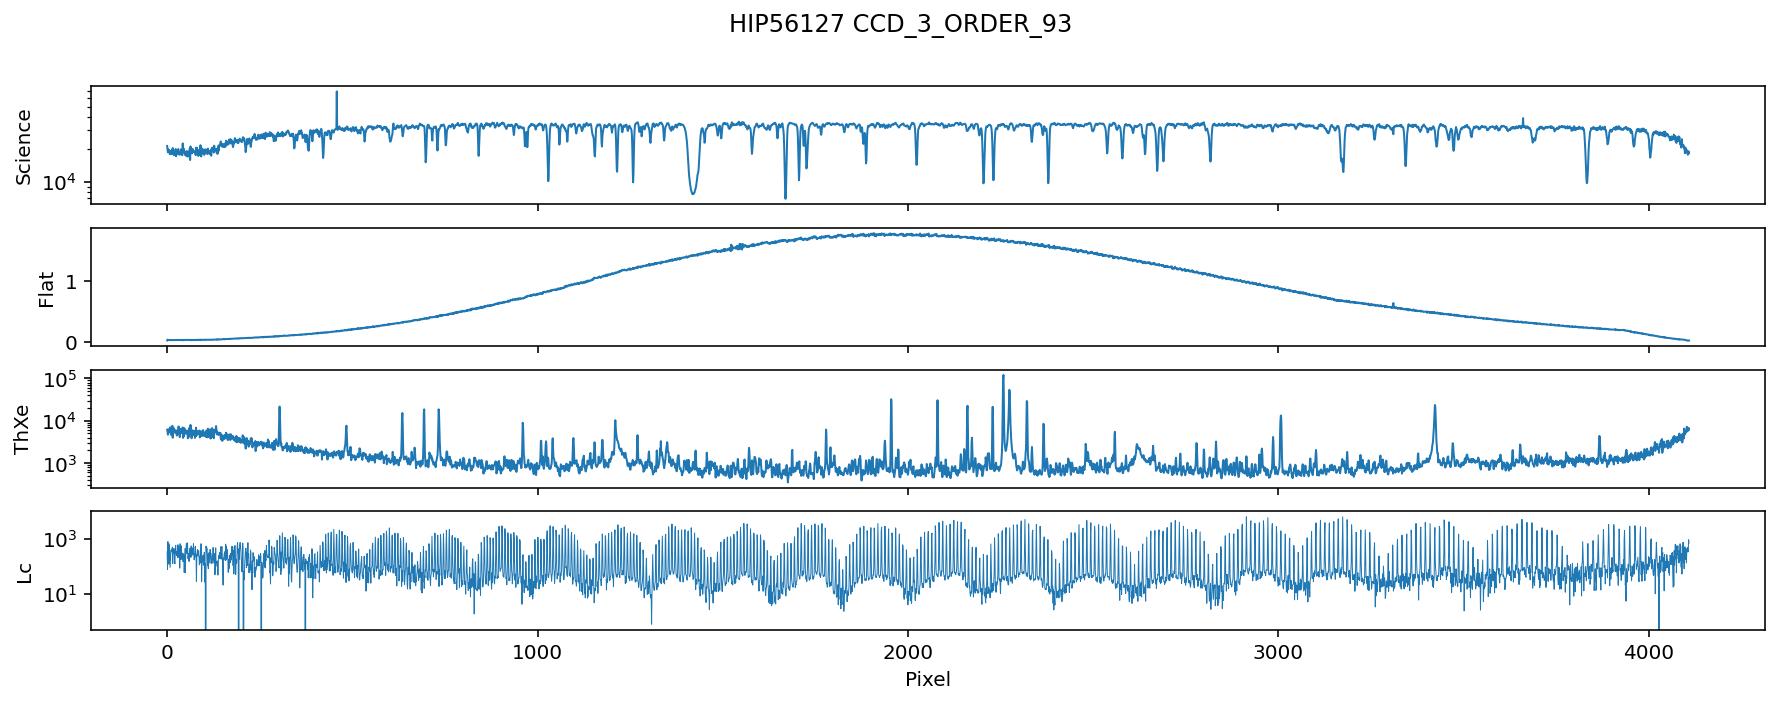

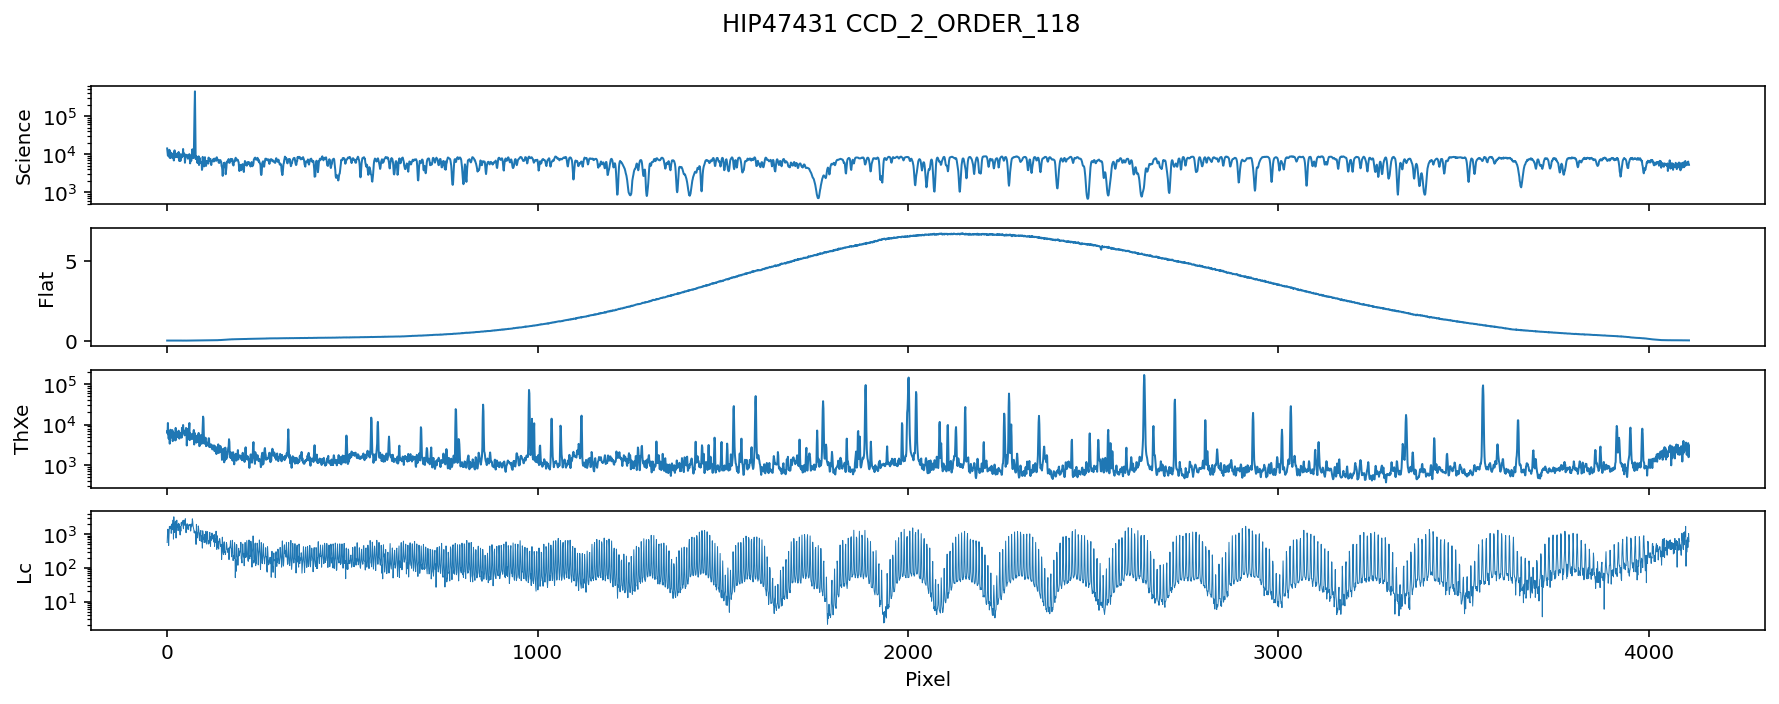

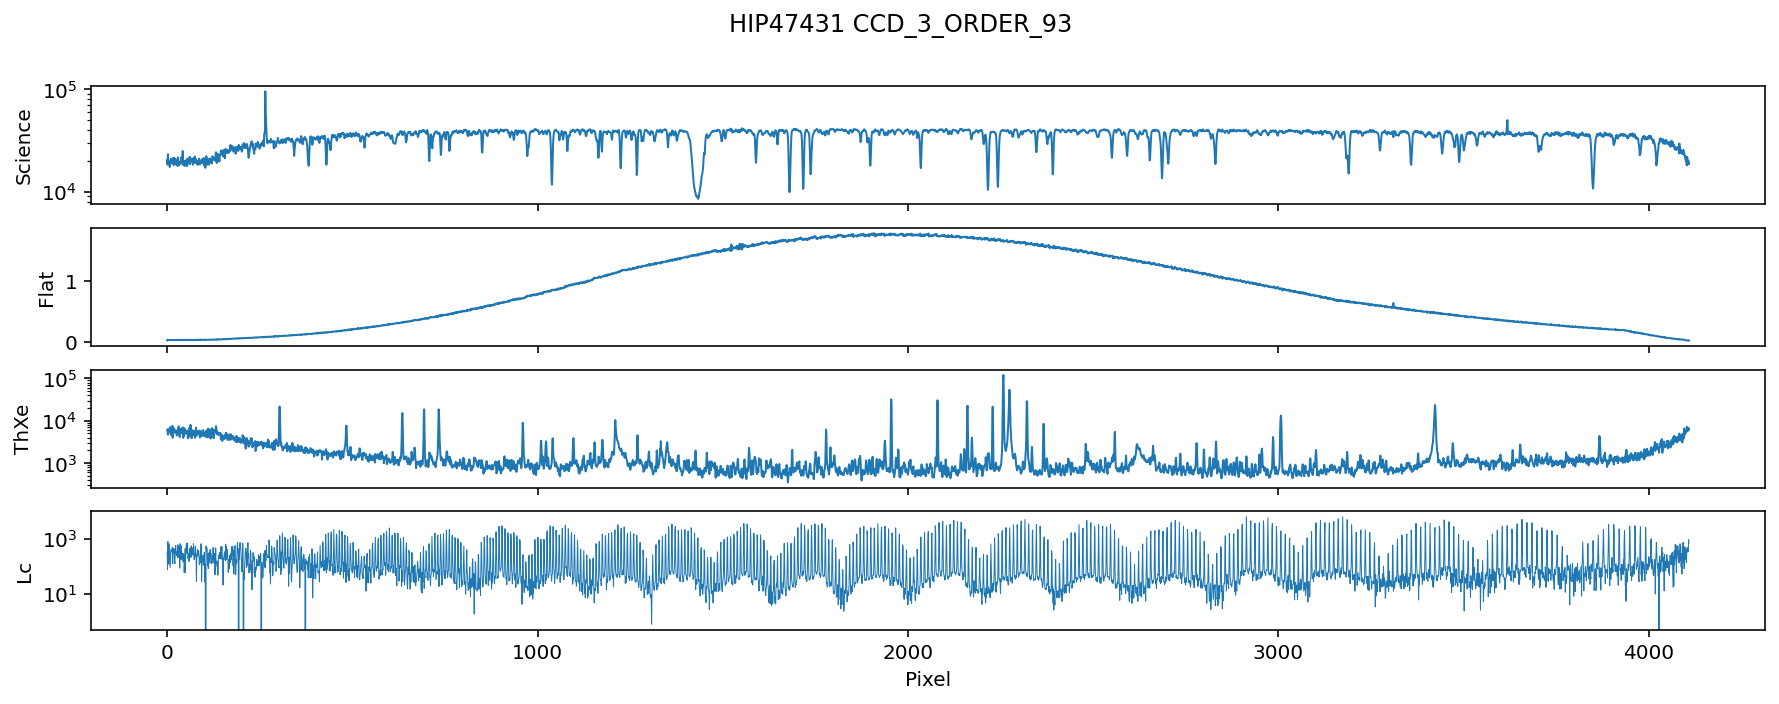

In [38]:
for science_object in list(science_objects):
    
    file = fits.open(path+science_object+'/minimal_'+science_object+'.fits')

    for order in range(1,len(file)):
        
        if file[order].header['EXTNAME'] in ['CCD_3_ORDER_93','CCD_2_ORDER_118']:

            f, gs = plt.subplots(4,1,figsize=(15,5),sharex=True)
            f.suptitle(science_object+' '+file[order].header['EXTNAME'])

            ax = gs[0]
            ax.plot(file[order].data[0,:]/file[order].data[1,:], lw=1)
            ax.set_yscale('log')
            ax.set_ylabel('Science')

            ax = gs[1]
            ax.plot(file[order].data[1,:], lw=1)
            ax.set_ylabel('Flat')

            ax = gs[2]
            ax.plot(file[order].data[2,:]/file[order].data[1,:], lw=1)
            ax.set_yscale('log')
            ax.set_ylabel('ThXe')

            ax = gs[3]
            ax.plot(file[order].data[3,:]/file[order].data[1,:], lw=0.5)
            ax.set_yscale('log')
            ax.set_ylabel('Lc')
            ax.set_xlabel('Pixel')

            plt.show()
            plt.close()